# **Database and Details**

##**Train Dataset**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
train_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
train_df["is_fraud"]

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [ ]:
train_df.shape

(1296675, 23)

In [ ]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
train_df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [ ]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
train_df = train_df.drop(["Unnamed: 0"],axis=1)

In [ ]:
train_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


##**Test Dataset**

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')
test_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [ ]:
test_df.shape

(555719, 23)

In [ ]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
test_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
test_df.nunique()

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [ ]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
test_df = test_df.drop(["Unnamed: 0"],axis=1)

#**Null Values**

In [ ]:
null_df =  train_df.copy(deep=True)

In [ ]:
class DataFrameAnalyzer:
    def __init__(self, df):
        self.df = df

    def get_column_info(self, col):
        unique_values = self.df[col].nunique()
        null_values_num = self.df[col].isnull().count()
        null_values_percent = self.df[col].isnull().mean() * 100
        data_type = str(self.df[col].dtype)

        return {
            "Column": col,
            "Number of unique values": unique_values,
            "Number of null values": null_values_num,
            "Percentage of null values": null_values_percent,
            "Data type": data_type
        }

    def analyze_dataframe(self):
        columns_to_sort = sorted(self.df.columns, key=lambda col: str(self.df[col].dtype))
        for col in columns_to_sort:
            col_info = self.get_column_info(col)
            self.print_column_info(col_info)

    @staticmethod
    def print_column_info(info):
        print(f"Column: {info['Column']}")
        print(f"Number of unique values: {info['Number of unique values']}")
        print(f"Number of null values: {info['Number of null values']}")
        print(f"Percentage of null values: {info['Percentage of null values']:.2f}%")
        print(f"Data type: {info['Data type']}")
        print()


In [ ]:
analyzer = DataFrameAnalyzer(null_df)
analyzer.analyze_dataframe()

Column: amt
Number of unique values: 52928
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: float64

Column: lat
Number of unique values: 968
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: float64

Column: long
Number of unique values: 969
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: float64

Column: merch_lat
Number of unique values: 1247805
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: float64

Column: merch_long
Number of unique values: 1275745
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: float64

Column: cc_num
Number of unique values: 983
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: int64

Column: zip
Number of unique values: 970
Number of null values: 1296675
Percentage of null values: 0.00%
Data type: int64

Column: city_pop
Number of unique values: 879
Number of null values: 1296675
Percentage of null values

#**Sampling**

In [ ]:
test_df.shape

(555719, 22)

The size of the test dataset is large, so we get a sample from it.

In [ ]:
fraud_column = "is_fraud"
fraud_values = test_df[fraud_column].unique()
df_fraud = test_df[test_df[fraud_column].isin([1])]
df_not_fraud = test_df[test_df[fraud_column].isin([0])]

In [ ]:
df_fraud.shape

(2145, 22)

In [ ]:
df_not_fraud.shape

(553574, 22)

 The number of instances that are not actually fraud is the problem because of the fact that it's very large. So the sampling process should be done on this part of our test dataframe.

In [ ]:
import random

def custom_sample(df_not_fraud, multiplier=10):
    sample_size = multiplier * len(df_fraud)
    df_fraud_no_sample = df_not_fraud.sample(sample_size)
    return df_fraud_no_sample


In [ ]:
df_not_fraud_sample = custom_sample(df_not_fraud, 10)
df_not_fraud_sample.shape

(21450, 22)

In [ ]:
df_not_fraud_sample.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
335457,2020-10-27 16:20:25,6011399591920186,"fraud_Hahn, Bahringer and McLaughlin",personal_care,25.71,Maria,Roy,F,58665 Nicholas Ford Suite 348,Sheffield,...,42.1001,-73.3611,2121,Radio producer,1973-10-14,71f91432ab9b6eaf758c9f747125b048,1382890825,41.439933,-72.935591,0


In [ ]:
df_test_sample = pd.concat([df_fraud, df_not_fraud_sample], ignore_index=True)
df_test_sample

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
2,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
3,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
4,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23590,2020-12-28 13:06:07,4599285557366057,fraud_Cormier LLC,shopping_net,120.45,Mary,Williams,F,00315 Ashley Valleys,Burrton,...,38.0261,-97.6666,1689,Gaffer,1997-11-18,146ab7768a89fc612e40a420ff79196b,1388235967,37.596513,-97.782594,0
23591,2020-12-07 03:04:54,6011367958204270,"fraud_Ferry, Reichel and DuBuque",grocery_net,52.12,Tammy,Ayers,F,1652 James Mews,Hinckley,...,41.2419,-81.7453,7646,Medical sales representative,1988-09-15,5c19e2079c4775b688ee051e1bf49bb9,1386385494,41.107877,-82.420852,0
23592,2020-07-19 19:21:30,6011542681743618,fraud_Kub PLC,personal_care,14.37,Emily,Hall,F,8851 Reese Neck,Basye,...,38.8089,-78.7776,863,"Engineer, mining",1972-08-09,239e4f3f49c8fa22765308681a9706a3,1374261690,39.363079,-79.063021,0
23593,2020-09-13 22:46:43,4383521454815,fraud_Denesik and Sons,shopping_pos,10.26,John,Robertson,M,209 Austin Stream Apt. 231,Indianapolis,...,39.9347,-86.1633,910148,Academic librarian,1987-09-22,03e9cbf31843acb2fad824c16cced6f9,1379112403,39.636080,-86.422117,0


In [ ]:
df_test_sample.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.60429,1


In [ ]:
X_train = train_df.drop(["is_fraud"],axis=1)
Y_train = train_df["is_fraud"]
X_test = df_test_sample.drop(["is_fraud"],axis=1)
Y_test = df_test_sample["is_fraud"]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
X_train, Y_train = RandomUnderSampler().fit_resample(X_train, Y_train)

In [ ]:
X_train.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2019-09-21 20:10:02,4423489490781412,fraud_Schimmel-Olson,kids_pets,67.23,Christopher,Ortega,M,5045 Emily Wall,Princeton,...,52768,41.6858,-90.3706,1426,Agricultural consultant,1957-03-06,e857431132648809b0413b57219d48aa,1348258202,42.548686,-90.51375


#**Data processing**

Here we have two sections: numerical and categorical columns. We can decide to apply what transformations on each to get the right information.

In [ ]:
df_proc = X_train.copy(deep=True)

In [ ]:
!pip install haversine
from haversine import haversine
from sklearn.base import BaseEstimator, TransformerMixin
class HaversineDistance(BaseEstimator, TransformerMixin):
    def fit(self, X: pd.DataFrame, y=None) -> "HaversineDistance":
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        X = X.copy()
        X["haversine_dist"] = X.apply(
            lambda row: haversine(
                (row["lat"], row["long"]), (row["merch_lat"], row["merch_long"])
            ),
            axis=1,
        )
        return X

In [ ]:
haversine_transformer = HaversineDistance()
df_transformed = haversine_transformer.fit_transform(df_proc)
X_test =haversine_transformer.fit_transform(X_test)
df_transformed.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,haversine_dist
0,2019-09-21 20:10:02,4423489490781412,fraud_Schimmel-Olson,kids_pets,67.23,Christopher,Ortega,M,5045 Emily Wall,Princeton,...,41.6858,-90.3706,1426,Agricultural consultant,1957-03-06,e857431132648809b0413b57219d48aa,1348258202,42.548686,-90.513750,96.672389
1,2020-05-30 08:30:13,30273037698427,"fraud_Zieme, Bode and Dooley",gas_transport,49.07,Andrew,Patterson,M,06959 Stephen Branch Suite 246,Thida,...,35.5762,-91.4539,111,Careers information officer,2000-06-13,c133150be25497fa16862dcb9302706a,1369902613,36.476755,-92.121787,116.767814
2,2020-06-07 22:09:19,4629451965224809,"fraud_McLaughlin, Armstrong and Koepp",travel,4.82,Karen,Warren,F,4900 Curtis Gardens Suite 952,Hahira,...,30.9416,-83.3574,10295,"Teacher, special educational needs",1997-12-26,a4d3a8b3ad04d0330a4c684130eac1bb,1370642959,30.107250,-83.363941,92.777731
3,2019-02-04 06:30:16,6011893664860915,fraud_Schamberger-O'Keefe,grocery_pos,238.74,Erin,Chavez,F,3379 Williams Common,Littleton,...,39.5994,-105.0044,320420,Water engineer,1975-07-31,e922454e73be0d276fb2a5d5d28d0185,1328337016,39.138660,-104.265828,81.581432
4,2020-03-31 17:03:35,30266994494236,"fraud_Cormier, Stracke and Thiel",entertainment,89.50,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,37.1349,-77.7364,1051,Chief Operating Officer,1976-11-21,f8d1289fed90c5c61c1a11aa16bed456,1364749415,36.907252,-77.031883,67.474721


In [ ]:
X_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,haversine_dist
0,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,80.649251
1,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,66.098009
2,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,28.837549
3,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,103.089169
4,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,60.505032


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class AgeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X: pd.DataFrame, y=None) -> "AgeTransformer":
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        return self._transform_age(X)

    @staticmethod
    def _transform_age(X: pd.DataFrame) -> pd.DataFrame:
        transformed_X = X.copy()

        transformed_X["trans_date_trans_time"] = pd.to_datetime(transformed_X["trans_date_trans_time"])
        transformed_X["dob"] = pd.to_datetime(transformed_X["dob"])
        transformed_X["age"] = transformed_X.apply(AgeTransformer._calculate_age, axis=1)

        return transformed_X

    @staticmethod
    def _calculate_age(row: pd.Series) -> int:
        days_diff = (row["trans_date_trans_time"] - row["dob"]).days
        return int(days_diff / 365)


In [ ]:
age_transformer = AgeTransformer()
df_transformed = age_transformer.fit_transform(df_transformed)
X_test = age_transformer.transform(X_test)
df_transformed.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,haversine_dist,age
0,2019-09-21 20:10:02,4423489490781412,fraud_Schimmel-Olson,kids_pets,67.23,Christopher,Ortega,M,5045 Emily Wall,Princeton,...,-90.3706,1426,Agricultural consultant,1957-03-06,e857431132648809b0413b57219d48aa,1348258202,42.548686,-90.513750,96.672389,62
1,2020-05-30 08:30:13,30273037698427,"fraud_Zieme, Bode and Dooley",gas_transport,49.07,Andrew,Patterson,M,06959 Stephen Branch Suite 246,Thida,...,-91.4539,111,Careers information officer,2000-06-13,c133150be25497fa16862dcb9302706a,1369902613,36.476755,-92.121787,116.767814,19
2,2020-06-07 22:09:19,4629451965224809,"fraud_McLaughlin, Armstrong and Koepp",travel,4.82,Karen,Warren,F,4900 Curtis Gardens Suite 952,Hahira,...,-83.3574,10295,"Teacher, special educational needs",1997-12-26,a4d3a8b3ad04d0330a4c684130eac1bb,1370642959,30.107250,-83.363941,92.777731,22
3,2019-02-04 06:30:16,6011893664860915,fraud_Schamberger-O'Keefe,grocery_pos,238.74,Erin,Chavez,F,3379 Williams Common,Littleton,...,-105.0044,320420,Water engineer,1975-07-31,e922454e73be0d276fb2a5d5d28d0185,1328337016,39.138660,-104.265828,81.581432,43
4,2020-03-31 17:03:35,30266994494236,"fraud_Cormier, Stracke and Thiel",entertainment,89.50,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,-77.7364,1051,Chief Operating Officer,1976-11-21,f8d1289fed90c5c61c1a11aa16bed456,1364749415,36.907252,-77.031883,67.474721,43


In [ ]:
X_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,haversine_dist,age
0,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,80.649251,50
1,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,66.098009,61
2,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,28.837549,61
3,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,103.089169,26
4,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,60.505032,50


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class DateFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X: pd.DataFrame, y=None) -> "DateFeatures":
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        return self._transform_features(X)

    def _transform_features(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        X["trans_date_trans_time"] = pd.to_datetime(X["trans_date_trans_time"])
        X["day"] = X["trans_date_trans_time"].dt.day
        X["day_of_week"] = X["trans_date_trans_time"].dt.dayofweek
        X["month"] = X["trans_date_trans_time"].dt.month
        X["year"] = X["trans_date_trans_time"].dt.year
        return X


In [ ]:
date_feature_transformer = DateFeatures()
df_transformed = date_feature_transformer.fit_transform(df_transformed)
X_test = date_feature_transformer.transform(X_test)
df_transformed.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,2019-09-21 20:10:02,4423489490781412,fraud_Schimmel-Olson,kids_pets,67.23,Christopher,Ortega,M,5045 Emily Wall,Princeton,...,e857431132648809b0413b57219d48aa,1348258202,42.548686,-90.513750,96.672389,62,21,5,9,2019
1,2020-05-30 08:30:13,30273037698427,"fraud_Zieme, Bode and Dooley",gas_transport,49.07,Andrew,Patterson,M,06959 Stephen Branch Suite 246,Thida,...,c133150be25497fa16862dcb9302706a,1369902613,36.476755,-92.121787,116.767814,19,30,5,5,2020
2,2020-06-07 22:09:19,4629451965224809,"fraud_McLaughlin, Armstrong and Koepp",travel,4.82,Karen,Warren,F,4900 Curtis Gardens Suite 952,Hahira,...,a4d3a8b3ad04d0330a4c684130eac1bb,1370642959,30.107250,-83.363941,92.777731,22,7,6,6,2020
3,2019-02-04 06:30:16,6011893664860915,fraud_Schamberger-O'Keefe,grocery_pos,238.74,Erin,Chavez,F,3379 Williams Common,Littleton,...,e922454e73be0d276fb2a5d5d28d0185,1328337016,39.138660,-104.265828,81.581432,43,4,0,2,2019
4,2020-03-31 17:03:35,30266994494236,"fraud_Cormier, Stracke and Thiel",entertainment,89.50,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,f8d1289fed90c5c61c1a11aa16bed456,1364749415,36.907252,-77.031883,67.474721,43,31,1,3,2020


In [ ]:
X_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,80.649251,50,21,6,6,2020
1,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,66.098009,61,21,6,6,2020
2,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,28.837549,61,21,6,6,2020
3,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,103.089169,26,21,6,6,2020
4,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,60.505032,50,21,6,6,2020


In [ ]:
class MemoryEfficientTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X: pd.DataFrame, y=None) -> "MemoryEfficientTransformer":
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        X = X.copy()
        for col in X.select_dtypes(include=["float"]):
            X[col] = pd.to_numeric(X[col], downcast="float")
        for col in X.select_dtypes(include=["int"]):
            X[col] = pd.to_numeric(X[col], downcast="integer")
        return X

In [ ]:
ME_transformer = MemoryEfficientTransformer()
df_transformed = ME_transformer.fit_transform(df_transformed)
X_test = ME_transformer.transform(X_test)
df_transformed.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,2019-09-21 20:10:02,4423489490781412,fraud_Schimmel-Olson,kids_pets,67.230003,Christopher,Ortega,M,5045 Emily Wall,Princeton,...,e857431132648809b0413b57219d48aa,1348258202,42.548687,-90.513748,96.672386,62,21,5,9,2019
1,2020-05-30 08:30:13,30273037698427,"fraud_Zieme, Bode and Dooley",gas_transport,49.070000,Andrew,Patterson,M,06959 Stephen Branch Suite 246,Thida,...,c133150be25497fa16862dcb9302706a,1369902613,36.476753,-92.121788,116.767815,19,30,5,5,2020
2,2020-06-07 22:09:19,4629451965224809,"fraud_McLaughlin, Armstrong and Koepp",travel,4.820000,Karen,Warren,F,4900 Curtis Gardens Suite 952,Hahira,...,a4d3a8b3ad04d0330a4c684130eac1bb,1370642959,30.107250,-83.363937,92.777733,22,7,6,6,2020
3,2019-02-04 06:30:16,6011893664860915,fraud_Schamberger-O'Keefe,grocery_pos,238.740005,Erin,Chavez,F,3379 Williams Common,Littleton,...,e922454e73be0d276fb2a5d5d28d0185,1328337016,39.138660,-104.265831,81.581429,43,4,0,2,2019
4,2020-03-31 17:03:35,30266994494236,"fraud_Cormier, Stracke and Thiel",entertainment,89.500000,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,f8d1289fed90c5c61c1a11aa16bed456,1364749415,36.907253,-77.031883,67.474724,43,31,1,3,2020


In [ ]:
X_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.840000,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,16bf2e46c54369a8eab2214649506425,1371852399,32.575874,-102.604286,80.649254,50,21,6,6,2020
1,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.520020,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461128,-91.147148,66.098007,61,21,6,6,2020
2,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.330017,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771835,-90.158363,28.837549,61,21,6,6,2020
3,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.689941,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204973,-90.261597,103.089172,26,21,6,6,2020
4,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.650024,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315783,-102.736389,60.505032,50,21,6,6,2020


In [ ]:
columns_to_drop = ["trans_num", "last", "first", "zip", "state", "city", "street", "unix_time","trans_date_trans_time" ,"dob"]
df_transformed = df_transformed.drop(columns_to_drop,axis=1)
df_transformed.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,4423489490781412,fraud_Schimmel-Olson,kids_pets,67.230003,M,41.685799,-90.370598,1426,Agricultural consultant,42.548687,-90.513748,96.672386,62,21,5,9,2019
1,30273037698427,"fraud_Zieme, Bode and Dooley",gas_transport,49.070000,M,35.576199,-91.453903,111,Careers information officer,36.476753,-92.121788,116.767815,19,30,5,5,2020
2,4629451965224809,"fraud_McLaughlin, Armstrong and Koepp",travel,4.820000,F,30.941601,-83.357399,10295,"Teacher, special educational needs",30.107250,-83.363937,92.777733,22,7,6,6,2020
3,6011893664860915,fraud_Schamberger-O'Keefe,grocery_pos,238.740005,F,39.599400,-105.004402,320420,Water engineer,39.138660,-104.265831,81.581429,43,4,0,2,2019
4,30266994494236,"fraud_Cormier, Stracke and Thiel",entertainment,89.500000,F,37.134899,-77.736397,1051,Chief Operating Officer,36.907253,-77.031883,67.474724,43,31,1,3,2020


In [ ]:
df_transformed.shape

(15012, 17)

In [ ]:
X_test = X_test.drop(columns_to_drop,axis =1)
X_test.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.840000,F,31.859900,-102.741302,23,Cytogeneticist,32.575874,-102.604286,80.649254,50,21,6,6,2020
1,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.520020,M,42.554501,-90.350800,1306,Public relations officer,42.461128,-91.147148,66.098007,61,21,6,6,2020
2,6564459919350820,fraud_Nienow PLC,entertainment,620.330017,M,42.554501,-90.350800,1306,Public relations officer,42.771835,-90.158363,28.837549,61,21,6,6,2020
3,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.689941,M,30.459000,-90.902702,71335,Herbalist,31.204973,-90.261597,103.089172,26,21,6,6,2020
4,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.650024,F,31.859900,-102.741302,23,Cytogeneticist,31.315783,-102.736389,60.505032,50,21,6,6,2020


In [ ]:
X_test.shape

(23595, 17)

#**Data Scaling**

In [ ]:
df_scale = df_transformed.copy(deep=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_dataframe(df, columns, scaler):
    df_scaled = df.copy(deep=True)
    df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    return df_scaled

numerical_cols = ["amt", "lat", "long", "merch_lat", "merch_long", "city_pop"]
scaler = StandardScaler()
df_scale = scale_dataframe(df_transformed, numerical_cols, scaler)
X_test = scale_dataframe(X_test, numerical_cols, scaler)
print(df_scale[numerical_cols])


            amt       lat      long  merch_lat  merch_long  city_pop
0     -0.623944  0.602396 -0.018759   0.764467   -0.028729 -0.291579
1     -0.672822 -0.584257 -0.096022  -0.405346   -0.143269 -0.295863
2     -0.791921 -1.484424  0.481433  -1.632488    0.480550 -0.262684
3     -0.162324  0.197160 -1.062465   0.107495   -1.008286  0.747674
4     -0.564004 -0.281514  0.882332  -0.322406    0.931580 -0.292800
...         ...       ...       ...        ...         ...       ...
15007  1.824734 -2.127046  0.692139  -2.252574    0.660729  0.047934
15008  2.454278 -2.127046  0.692139  -1.996719    0.730444  0.047934
15009 -0.777333 -1.578159 -0.056710  -1.710861   -0.089124 -0.063822
15010 -0.746515 -1.306065 -0.901058  -1.137735   -0.952664 -0.296149
15011 -0.777441 -1.578159 -0.056710  -1.390508    0.012686 -0.063822

[15012 rows x 6 columns]


In [ ]:
X_test[numerical_cols]

,amt,lat,long,merch_lat,merch_long,city_pop
0,-0.385058,-1.313583,-0.912394,-1.164582,-0.901529,-0.291819
1,3.037810,0.783761,-0.008691,0.761664,-0.066400,-0.287614
2,2.312226,0.783761,-0.008691,0.822208,0.005674,-0.287614
3,4.383847,-1.588317,-0.048944,-1.431717,-0.001851,-0.058096
4,3.319229,-1.313583,-0.912394,-1.410124,-0.911158,-0.291819
...,...,...,...,...,...,...
23590,0.048009,-0.104315,-0.542270,-0.186258,-0.550068,-0.286359
23591,-0.261493,0.526344,0.618952,0.497968,0.569673,-0.266835
23592,-0.432482,0.049202,0.835401,0.157976,0.814430,-0.289066
23593,-0.451099,0.269985,0.296725,0.211174,0.278014,2.691088


In [ ]:
df_scale.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,4423489490781412,fraud_Schimmel-Olson,kids_pets,-0.623944,M,0.602396,-0.018759,-0.291579,Agricultural consultant,0.764467,-0.028729,96.672386,62,21,5,9,2019
1,30273037698427,"fraud_Zieme, Bode and Dooley",gas_transport,-0.672822,M,-0.584257,-0.096022,-0.295863,Careers information officer,-0.405346,-0.143269,116.767815,19,30,5,5,2020
2,4629451965224809,"fraud_McLaughlin, Armstrong and Koepp",travel,-0.791921,F,-1.484424,0.481433,-0.262684,"Teacher, special educational needs",-1.632488,0.480550,92.777733,22,7,6,6,2020
3,6011893664860915,fraud_Schamberger-O'Keefe,grocery_pos,-0.162324,F,0.197160,-1.062465,0.747674,Water engineer,0.107495,-1.008286,81.581429,43,4,0,2,2019
4,30266994494236,"fraud_Cormier, Stracke and Thiel",entertainment,-0.564004,F,-0.281514,0.882332,-0.292800,Chief Operating Officer,-0.322406,0.931580,67.474724,43,31,1,3,2020


In [ ]:
X_test.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,haversine_dist,age,day,day_of_week,month,year
0,3560725013359375,fraud_Hamill-D'Amore,health_fitness,-0.385058,F,-1.313583,-0.912394,-0.291819,Cytogeneticist,-1.164582,-0.901529,80.649254,50,21,6,6,2020
1,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,3.037810,M,0.783761,-0.008691,-0.287614,Public relations officer,0.761664,-0.066400,66.098007,61,21,6,6,2020
2,6564459919350820,fraud_Nienow PLC,entertainment,2.312226,M,0.783761,-0.008691,-0.287614,Public relations officer,0.822208,0.005674,28.837549,61,21,6,6,2020
3,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,4.383847,M,-1.588317,-0.048944,-0.058096,Herbalist,-1.431717,-0.001851,103.089172,26,21,6,6,2020
4,3560725013359375,fraud_Hermann and Sons,shopping_pos,3.319229,F,-1.313583,-0.912394,-0.291819,Cytogeneticist,-1.410124,-0.911158,60.505032,50,21,6,6,2020


#**Data Encoding**

In [ ]:
df_encoded = df_scale.copy(deep=True)

In [ ]:
encoded_test= X_test.copy(deep=True)

In [ ]:
categorical_columns = ["cc_num", "merchant", "category", "gender", "job"]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown ='ignore',
    categories='auto'
)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(df_encoded)
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
X_encoded.shape

(15012, 2193)

In [ ]:
X_test_encoded.shape

(23595, 2193)

#**Model**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
plt.figure(figsize=(16, 16))
models = [
    ("Logistic Regression", LogisticRegression()),
    ("LinearSVC", CalibratedClassifierCV(LinearSVC())),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
]


<Figure size 1600x1600 with 0 Axes>

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Logistic Regression
Accuracy 0.6751430387794024
AUC 0.7237762237762239
F1 Score 0.3047619047619048
LinearSVC


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model LinearSVC
Accuracy 0.7309175672812036
AUC 0.7504662004662004
F1 Score 0.3435011891221177
KNN
Model KNN
Accuracy 0.6323373596100869
AUC 0.6131701631701632
F1 Score 0.2257920571173583
Decision Tree
Model Decision Tree
Accuracy 0.8008052553507099
AUC 0.6714219114219114
F1 Score 0.31903796001159085
Random Forest
Model Random Forest
Accuracy 0.8281415554142827
AUC 0.7896736596736597
F1 Score 0.4399944759011186
Naive Bayes
Model Naive Bayes
Accuracy 0.46408137317228226
AUC 0.2915384615384615
F1 Score 0.026633823416211223


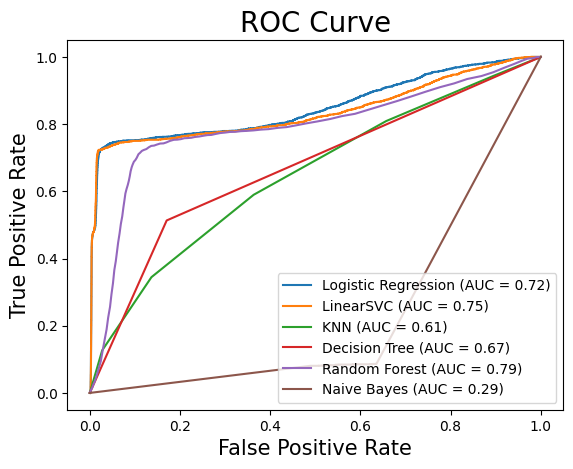

In [ ]:
for name, model in models:
    print(name)

    model.fit(X_encoded, Y_train)
    y_pred = model.predict(X_test_encoded)
    y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]

    accuracy = accuracy_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    print("Model "+ name),
    print( "Accuracy " + str(accuracy)),
    print("AUC "+ str(auc)),
    print("F1 Score "+ str(f1))

    #roc curve
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
#now we have to plot the roc curve for our models
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC Curve", fontsize=20)
plt.legend(loc="lower right")
plt.savefig("roc_curve.eps", format="eps")
plt.show()